# EMNIST Letters *Recognition* (0-9, A-Z and Space ~)

# 0. Load packages and co.

In [ ]:
import numpy as np
import pandas as pd

import csv
import tensorflow as tf
import matplotlib.pyplot as plt
import time
import random
import os
import datetime

from tensorflow import keras
from keras import models
from keras import layers
from keras.optimizers import RMSprop


import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def img_show(img,colorbar=False):
    plt.figure(figsize=(10,8))
    plt.imshow(img,cmap='Greys_r')
    if colorbar:
        plt.colorbar()
    plt.show()

# 1. Load EMNIST balanced dataset
Introduced by https://arxiv.org/abs/1702.05373v1 downloaded from https://www.nist.gov/itl/iad/image-group/emnist-dataset 

## 1.1. Load the data

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Current DataSet Path
PATH = '/content/drive/MyDrive/upwork/11_alphabet_recognition'
%cd /content/drive/MyDrive/upwork/11_alphabet_recognition/

Mounted at /content/drive
/content/drive/MyDrive/upwork/11_alphabet_recognition


Firstly, we need to load our data, notice that there is no column names in csv files and thus header should be set to `None`.

1 column for the label and then 28x28=784 columns for the pixels of the 28x28 images

## 2.3. Evaluate model

In [ ]:
SaveModelDir="EMNIST_Digits&Letters_Training"
checkpoint_path = SaveModelDir+"/cp.ckpt"

model = tf.keras.models.load_model(SaveModelDir+'/Model_2_digits')

# Check its architecture
model.summary()

# Loads the weights
model.load_weights(checkpoint_path)



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 16)        272       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 9, 9, 32)          8224      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               5

## 2.3. Test model on our data (will only for the combined Letters and Digits Model)

In [ ]:
import os
import cv2
path_images = "./own_test_data/"

In [ ]:
cv2.imread(path_images+'roi-fn-0.png').shape

(28, 28, 3)

In [ ]:
np.array(plt.imread(path_images+'roi-fn-0.png')).shape

(28, 28)

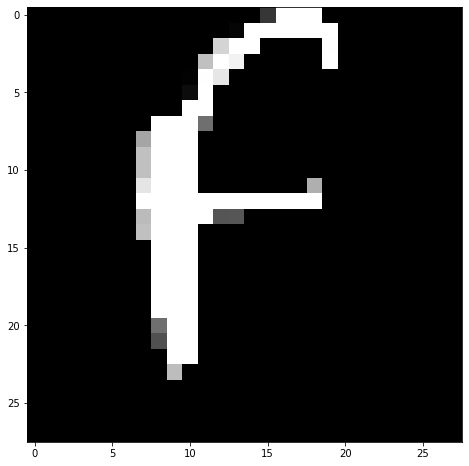

In [ ]:
img_show(np.array(plt.imread(path_images+'roi-fn-0.png')))

In [ ]:
handwritten_characters = [ ]

for filename in sorted(os.listdir(path_images)):
  img_ = np.array(plt.imread(path_images+filename))
  #img_ = cv2.imread(path_images+filename)
  handwritten_characters.append(img_)
  print(filename)


roi-fn-0.png
roi-fn-1.png
roi-fn-2.png
roi-fn-3.png
roi-fn-4.png
roi-fn-5.png
roi-fn-6.png
roi-ln-0.png
roi-ln-1.png
roi-ln-2.png
roi-ln-3.png
roi-ln-4.png
roi-ln-5.png
roi-ln-6.png
roi-sd-0.png
roi-sd-1.png
roi-sd-2.png
roi-sd-3.png
roi-sd-4.png
roi-sd-5.png
roi-sd-6.png
roi-sd-7.png
roi-sd-8.png
roi-sd-9.png


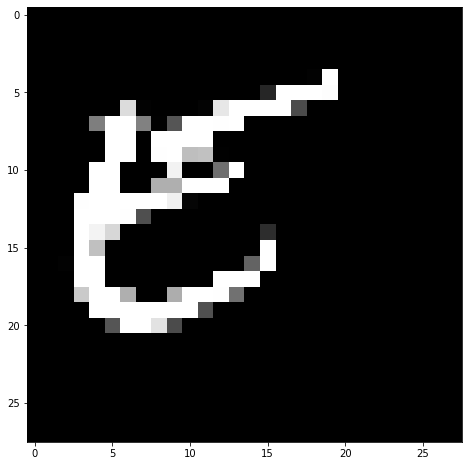

In [ ]:
handwritten_characters[2].shape
img_show(handwritten_characters[1])

In [ ]:
index=7
labels = ['0','1','2','3','4','5','6','7','8','9','A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','~']
# img_show(handwritten_characters[index])
charac = handwritten_characters[index].reshape((-1,28,28,1))
str(labels[np.argmax(model.predict(charac))])

'R'

In [ ]:
len(handwritten_characters)

24

In [ ]:
digits_labels = ['0','1','2','3','4','5','6','7','8','9','~']
letters_labels = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z','~']

all_labels = digits_labels[:-1] + letters_labels[:]
print(all_labels)

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '~']


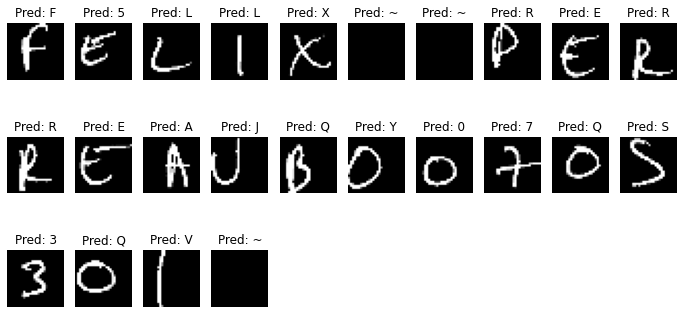

In [ ]:
# Re-evaluate the model
# loss, acc = model.evaluate(x_test, y_test, verbose=2)
# print("Restored model, accuracy: {:5.2f}%".format(100 * acc))


f = plt.figure(figsize=(12,8))

for i in range(len(handwritten_characters)):
    sp = f.add_subplot(4, 10, i+1)
    sp.axis('Off')
    charac = handwritten_characters[i].reshape((-1,28,28,1))
    pred_vect = model.predict(charac)
    predict_index= np.argmax(pred_vect[:,:])
    #print(predict_index)
    sp.set_title("Pred: "+ str(all_labels[predict_index]))
    #if i <15: # first 15 characters are lettersac
    #  sp.set_title("Pred: "+ str(letters_labels[np.argmax(pred_vect[:,10:])]))
    #else:
    #  sp.set_title("Pred: "+ str(digits_labels[np.argmax(pred_vect[:,:11])]))
    img = handwritten_characters[i]
    plt.imshow(img, cmap='gray')
  
